<a href="https://colab.research.google.com/github/AlisxB/Trabalho_Big_Data/blob/main/Crime_Analysis_FtCe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requisitos para funcionamento

## Importando bibliotecas

In [5]:
from google.colab import drive
import pandas as pd
import numpy as np
import requests
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Montando Google Drive

In [6]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Preparando ambiente de tratamento

### Baixando arquivos

In [7]:
#Criando pasta dados_sspds se não existir
if not os.path.exists('/content/drive/MyDrive/dados_sspds'):
  os.makedirs('/content/drive/MyDrive/dados_sspds')
  print('Pasta criada com sucesso!')

#Baixando arquivo para pasta no MyDrive com nome dados_sspds
urls = ['https://www.sspds.ce.gov.br/wp-content/uploads/sites/24/2024/06/CVLI_2009-a-2023.xlsx', 'https://www.sspds.ce.gov.br/wp-content/uploads/sites/24/2024/03/Furto_2009-a-2023.xlsx']
nomes_arquivos = ['CVLI_2009-a-2023.xlsx', 'Furto_2009-a-2023.xlsx']

#Baixando arquivo para pasta no MyDrive com nome dados_sspds
for url, nome_arquivo in zip(urls, nomes_arquivos):
  response = requests.get(url)
  with open(f'/content/drive/MyDrive/dados_sspds/{nome_arquivo}', 'wb') as f:
    f.write(response.content)
    print(f'Arquivo {nome_arquivo} baixado com sucesso!')

Arquivo CVLI_2009-a-2023.xlsx baixado com sucesso!
Arquivo Furto_2009-a-2023.xlsx baixado com sucesso!


### Lendo arquivos baixados

In [8]:
df1 = pd.read_excel('/content/drive/MyDrive/dados_sspds/CVLI_2009-a-2023.xlsx')
print(f'Arquivo {nomes_arquivos[0]} lido com sucesso')
df2 = pd.read_excel('/content/drive/MyDrive/dados_sspds/Furto_2009-a-2023.xlsx')
print(f'Arquivo {nomes_arquivos[1]} lido com sucesso')

Arquivo CVLI_2009-a-2023.xlsx lido com sucesso
Arquivo Furto_2009-a-2023.xlsx lido com sucesso


### Alinhando

In [9]:
def alinhar_colunas(df1, df2):
    # Padronizar os nomes das colunas (remover espaços e substituir por '_')
    df1.columns = [col.strip().replace(' ', '_') for col in df1.columns]
    df2.columns = [col.strip().replace(' ', '_') for col in df2.columns]

    # Encontrar colunas que estão em um DataFrame mas não no outro
    colunas_faltantes_df1 = set(df2.columns) - set(df1.columns)
    colunas_faltantes_df2 = set(df1.columns) - set(df2.columns)

    # Adicionar colunas faltantes em cada DataFrame, preenchendo com valores nulos (None para cuDF)
    for col in colunas_faltantes_df1:
        df1[col] = None
    for col in colunas_faltantes_df2:
        df2[col] = None

    # Ordenar as colunas de ambos para que fiquem na mesma ordem
    df1 = df1[df2.columns]

    return df1, df2

# Exemplo de uso com DataFrames cuDF
df1_alinhado, df2_alinhado = alinhar_colunas(df1, df2)
print('Colunas alinhadas com sucesso')

Colunas alinhadas com sucesso


### Preenchendo colunas com dados necessários faltantes

In [10]:
#Preenchendo coluna 'Natureza' de df2 para 'Furto'
df2_alinhado.loc[:, 'Natureza'] = df2_alinhado['Natureza'].fillna('FURTO')

#Preenchendo coluna 'Município' de df2 para Fortaleza
df2_alinhado.loc[:, 'Município'] = df2_alinhado['Município'].fillna('Fortaleza')

df2_alinhado.head()

,AIS,Município,Dia_da_Semana,Data,Hora,Escolaridade_da_Vítima,Natureza,Gênero,Meio_Empregado,Idade_da_Vítima,Raça_da_Vítima
0,AIS 05,Fortaleza,Quinta,2009-01-01,00:00:00,None,FURTO,None,None,None,None
1,AIS 05,Fortaleza,Quinta,2009-01-01,00:00:00,None,FURTO,None,None,None,None
2,AIS 05,Fortaleza,Quinta,2009-01-01,00:00:00,None,FURTO,None,None,None,None
3,AIS 05,Fortaleza,Quinta,2009-01-01,00:00:00,None,FURTO,None,None,None,None
4,AIS 05,Fortaleza,Quinta,2009-01-01,00:00:00,None,FURTO,None,None,None,None


### Filtrando município de Fortaleza

In [11]:
#Filtrando somente dados de Fortaleza
df1_alinhado = df1_alinhado[df1_alinhado['Município'] == 'Fortaleza']
df2_alinhado = df2_alinhado[df2_alinhado['Município'] == 'Fortaleza']

print('Dados filtrados com sucesso')

Dados filtrados com sucesso


#### Concatenando dados

In [12]:
df_limpo = pd.concat([df1_alinhado, df2_alinhado], ignore_index=True)
print('Dados concatenados com sucesso')

Dados concatenados com sucesso


### Criando colunas Ano, Mês e Dia

In [13]:
df_limpo['Ano'] = pd.to_datetime(df_limpo['Data']).dt.year
df_limpo['Mês'] = pd.to_datetime(df_limpo['Data']).dt.month
df_limpo['Dia'] = pd.to_datetime(df_limpo['Data']).dt.day

df_limpo.head()

,AIS,Município,Dia_da_Semana,Data,Hora,Escolaridade_da_Vítima,Natureza,Gênero,Meio_Empregado,Idade_da_Vítima,Raça_da_Vítima,Ano,Mês,Dia
0,AIS 08,Fortaleza,Quinta,2009-01-01,00:00:00,Não Informada,HOMICIDIO DOLOSO,Masculino,Outros meios,54,Não Informada,2009,1,1
1,AIS 10,Fortaleza,Quinta,2009-01-01,00:00:00,Não Informada,HOMICIDIO DOLOSO,Masculino,Arma de fogo,40,Não Informada,2009,1,1
2,AIS 01,Fortaleza,Quinta,2009-01-01,00:00:00,Não Informada,HOMICIDIO DOLOSO,Masculino,Arma de fogo,20,Não Informada,2009,1,1
3,AIS 08,Fortaleza,Quinta,2009-01-01,00:00:00,Não Informada,HOMICIDIO DOLOSO,Masculino,Arma de fogo,20,Não Informada,2009,1,1
4,AIS 02,Fortaleza,Quinta,2009-01-01,00:00:00,Não Informada,HOMICIDIO DOLOSO,Masculino,Arma branca,40,Não Informada,2009,1,1


### Conversão de Dados

In [14]:
df_limpo['Data'] = pd.to_datetime(df_limpo['Data']).dt.date
df_limpo['Hora'] = df_limpo['Hora'].astype(str)
df_limpo['Hora'] = pd.to_datetime(df_limpo['Hora'], errors='coerce').dt.strftime('%H:%M:%S')
df_limpo['AIS'] = df_limpo['AIS'].astype(str)
df_limpo['Município'] = df_limpo['Município'].astype(str)
df_limpo['Natureza'] = df_limpo['Natureza'].astype(str)
df_limpo['Meio_Empregado'] = df_limpo['Meio_Empregado'].astype(str)
df_limpo['Gênero'] = df_limpo['Gênero'].astype(str)
df_limpo['Raça_da_Vítima'] = df_limpo['Raça_da_Vítima'].astype(str)
df_limpo['Idade_da_Vítima'] = pd.to_numeric(df_limpo['Idade_da_Vítima'], errors='coerce').fillna(-1).astype(int)
df_limpo['Ano'] = df_limpo['Ano'].astype(int)
df_limpo['Mês'] = df_limpo['Mês'].astype(int)
df_limpo['Dia'] = df_limpo['Dia'].astype(int)

print('Dados convertidos com sucesso')

<ipython-input-14-ae86661373fd>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_limpo['Hora'] = pd.to_datetime(df_limpo['Hora'], errors='coerce').dt.strftime('%H:%M:%S')


Dados convertidos com sucesso


### Salvando planilha tratada

In [15]:
#Salvar em csv
df_limpo.to_csv('/content/drive/MyDrive/dados_sspds/dados_tratados.csv', index=False)

print('Dados salvos com sucesso')

Dados salvos com sucesso


# Iniciando exploração de dados

## Lendo dados tratados

In [16]:
df = pd.read_csv('/content/drive/MyDrive/dados_sspds/dados_tratados.csv')

<ipython-input-16-8e170b8d04a7>:1: DtypeWarning: Columns (5,7,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/dados_sspds/dados_tratados.csv')


## Análise

### Distribuição Temporal
Crimes Violentos Letais Intencionais + Furtos em relação aos anos de 2009 a 2023

#### Geral

##### Ano

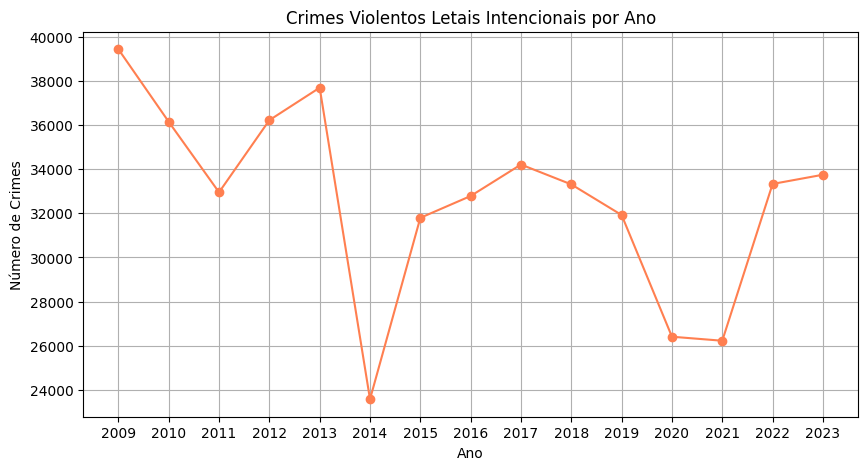

In [17]:
crimes_por_ano = df['Ano'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.plot(crimes_por_ano.index, crimes_por_ano, marker='o', color='coral', linestyle='-')
plt.title('Crimes Violentos Letais Intencionais por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Crimes')
plt.xticks(crimes_por_ano.index)

plt.grid()
plt.show()

##### Mês

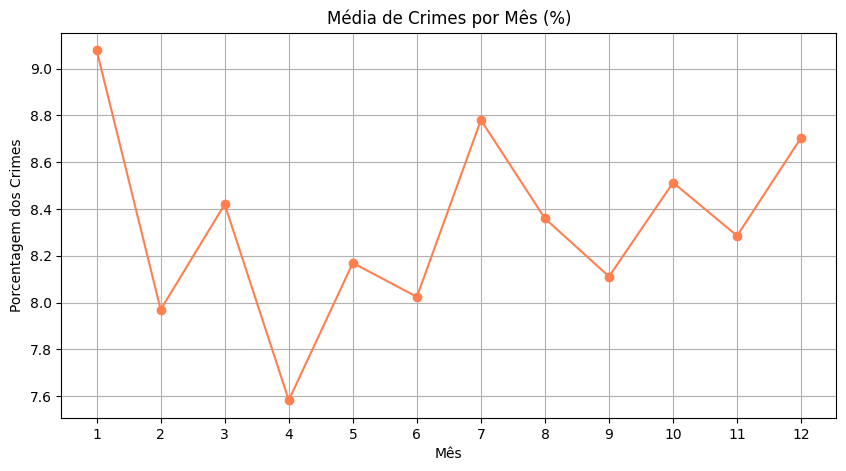

In [18]:
crimes_por_mes = df['Mês'].value_counts().sort_index()

# Calculando a média de crimes para cada mês
media_crimes_por_mes = crimes_por_mes / crimes_por_mes.sum() * 100
# Gráfico de crimes por mês usando lineplot
plt.figure(figsize=(10, 5))
plt.plot(media_crimes_por_mes.index, media_crimes_por_mes, marker='o', color='coral', linestyle='-')
plt.title('Média de Crimes por Mês (%)')
plt.xlabel('Mês')
plt.ylabel('Porcentagem dos Crimes')
plt.xticks(media_crimes_por_mes.index)  # Garantir que todos os meses apareçam no eixo x
plt.grid()  # Adiciona uma grade para melhor visualização
plt.show()

##### Dia do Mês

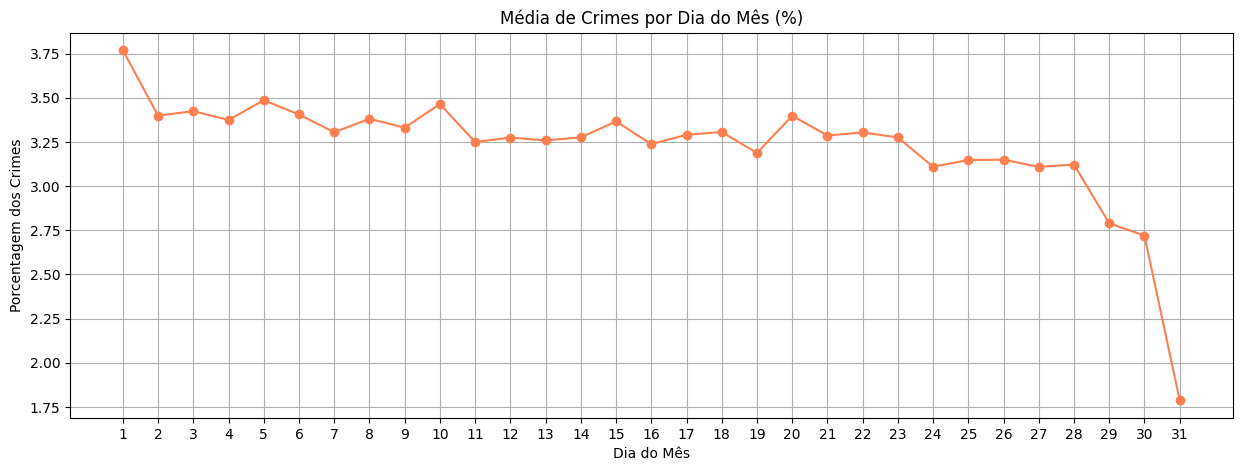

In [19]:
crimes_por_dia = df['Dia'].value_counts().sort_index()

# Calculando a média de crimes para cada dia do mês
media_crimes_por_dia = crimes_por_dia / crimes_por_dia.sum() * 100

# Gráfico de crimes por dia do mês usando lineplot
plt.figure(figsize=(15, 5))  # Aumentei a largura da figura para melhor visualização dos 31 dias
plt.plot(media_crimes_por_dia.index, media_crimes_por_dia, marker='o', color='coral', linestyle='-')
plt.title('Média de Crimes por Dia do Mês (%)')
plt.xlabel('Dia do Mês')
plt.ylabel('Porcentagem dos Crimes')
plt.xticks(media_crimes_por_dia.index)  # Garantir que todos os dias do mês apareçam no eixo x
plt.grid()
plt.show()

##### Dia da Semana

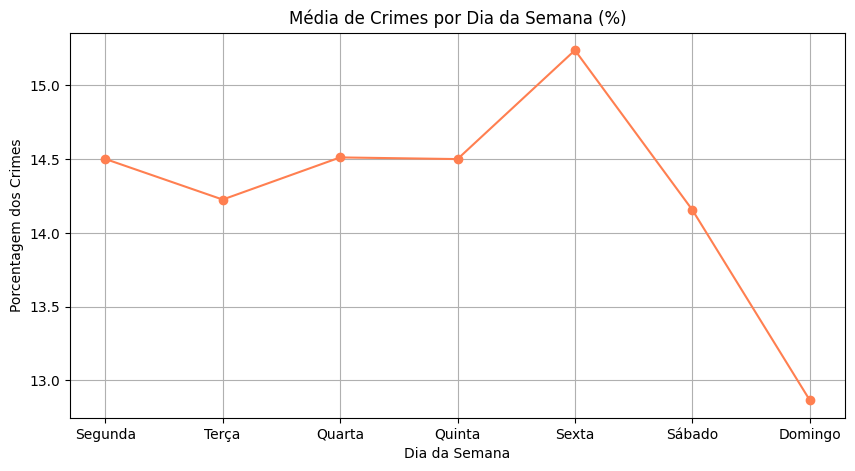

In [20]:
# Definindo a ordem dos dias da semana
dias_da_semana_ordenados = ["Segunda", "Terça", "Quarta", "Quinta", "Sexta", "Sábado", "Domingo"]

# Convertendo 'Dia_da_Semana' em uma categoria ordenada
df['Dia_da_Semana'] = pd.Categorical(df['Dia_da_Semana'], categories=dias_da_semana_ordenados, ordered=True)

# Contagem de crimes por dia da semana na ordem desejada
crimes_por_dia_semana = df['Dia_da_Semana'].value_counts().sort_index()

# Calculando a média de crimes para cada dia da semana
media_crimes_por_dia_semana = crimes_por_dia_semana / crimes_por_dia_semana.sum() * 100

# Gráfico de crimes por dia da semana usando lineplot
plt.figure(figsize=(10, 5))
plt.plot(media_crimes_por_dia_semana.index, media_crimes_por_dia_semana, marker='o', color='coral', linestyle='-')
plt.title('Média de Crimes por Dia da Semana (%)')
plt.xlabel('Dia da Semana')
plt.ylabel('Porcentagem dos Crimes')
plt.xticks(media_crimes_por_dia_semana.index)  # Garantir que todos os dias apareçam no eixo x
plt.grid()  # Adiciona uma grade para melhor visualização
plt.show()

#### Detalhado

##### Crimes Violentos Letais Intencionais

###### Ano

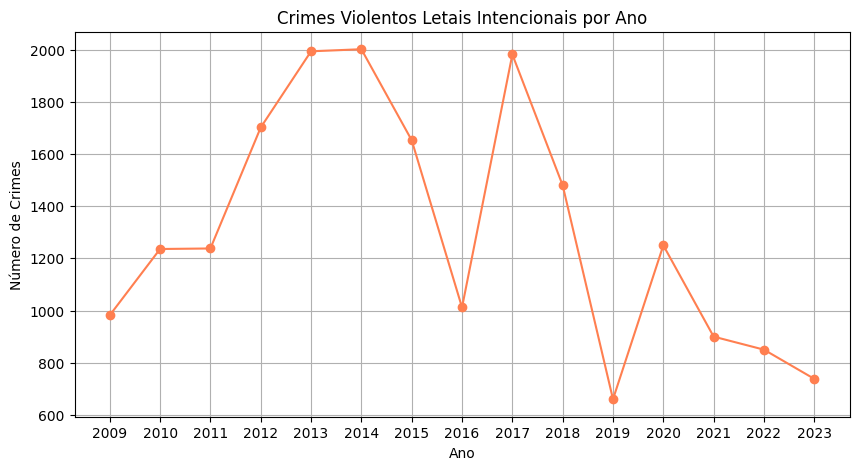

In [21]:
tipos_de_crime = ['HOMICIDIO DOLOSO', 'ROUBO SEGUIDO DE MORTE (LATROCINIO)', 'LESAO CORPORAL SEGUIDA DE MORTE', 'FEMINICÍDIO']
df_filtrado = df[df['Natureza'].isin(tipos_de_crime)]

# Contagem de crimes por ano
crimes_por_ano = df_filtrado['Ano'].value_counts().sort_index()

# Gráfico de crimes por ano
plt.figure(figsize=(10, 5))
plt.plot(crimes_por_ano.index, crimes_por_ano, marker='o', color='coral', linestyle='-')
plt.title('Crimes Violentos Letais Intencionais por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Crimes')
plt.xticks(crimes_por_ano.index)

plt.grid()
plt.show()

###### Mês


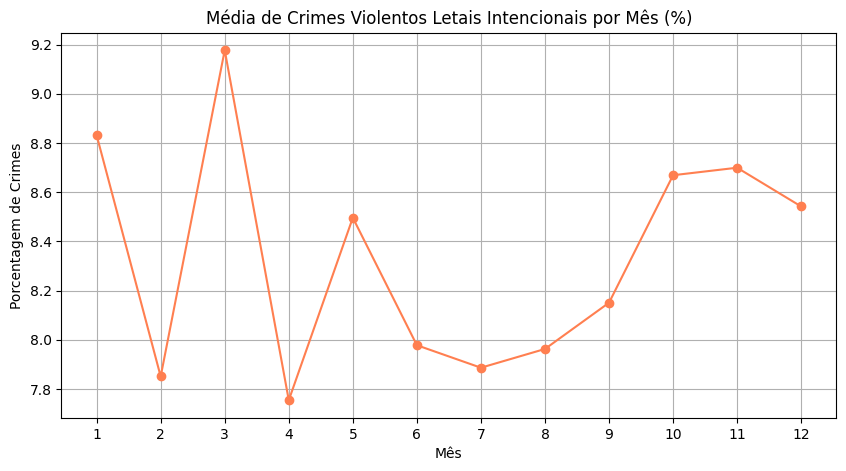

In [22]:
# Calculando a média de crimes por mês
media_crimes_por_mes = df_filtrado.groupby('Mês')['Natureza'].count().reset_index()
media_crimes_por_mes = media_crimes_por_mes.rename(columns={'Natureza': 'Média de Crimes'})

# Calculando a porcentagem em relação ao total de crimes no ano
total_crimes_ano = df_filtrado['Natureza'].count()
media_crimes_por_mes['Porcentagem'] = (media_crimes_por_mes['Média de Crimes'] / total_crimes_ano) * 100

# Gráfico da média de crimes por mês em porcentagem
plt.figure(figsize=(10, 5))
plt.plot(media_crimes_por_mes['Mês'], media_crimes_por_mes['Porcentagem'], marker='o', color='coral', linestyle='-')
plt.title('Média de Crimes Violentos Letais Intencionais por Mês (%)')
plt.xlabel('Mês')
plt.ylabel('Porcentagem de Crimes')
plt.xticks(media_crimes_por_mes['Mês'])
plt.grid()
plt.show()

###### Dia do Mês

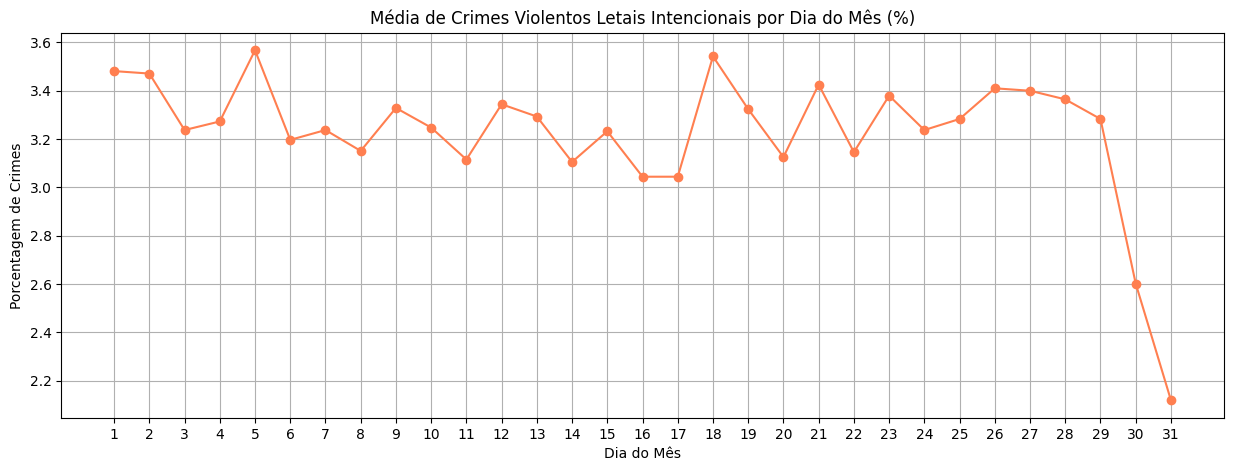

In [23]:
media_crimes_por_dia = df_filtrado.groupby('Dia')['Natureza'].count().reset_index()
media_crimes_por_dia = media_crimes_por_dia.rename(columns={'Natureza': 'Média de Crimes'})

# Calculando a porcentagem em relação ao total de crimes no ano
total_crimes_ano = df_filtrado['Natureza'].count()
media_crimes_por_dia['Porcentagem'] = (media_crimes_por_dia['Média de Crimes'] / total_crimes_ano) * 100

# Gráfico da média de crimes por dia do mês em porcentagem
plt.figure(figsize=(15, 5))  # Largura maior para acomodar os 31 dias
plt.plot(media_crimes_por_dia['Dia'], media_crimes_por_dia['Porcentagem'], marker='o', color='coral', linestyle='-')
plt.title('Média de Crimes Violentos Letais Intencionais por Dia do Mês (%)')
plt.xlabel('Dia do Mês')
plt.ylabel('Porcentagem de Crimes')
plt.xticks(media_crimes_por_dia['Dia'])
plt.grid()
plt.show()

###### Dia

<ipython-input-24-675063e328dd>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_crimes_por_dia_semana = df_filtrado.groupby('Dia_da_Semana')['Natureza'].count().reset_index()


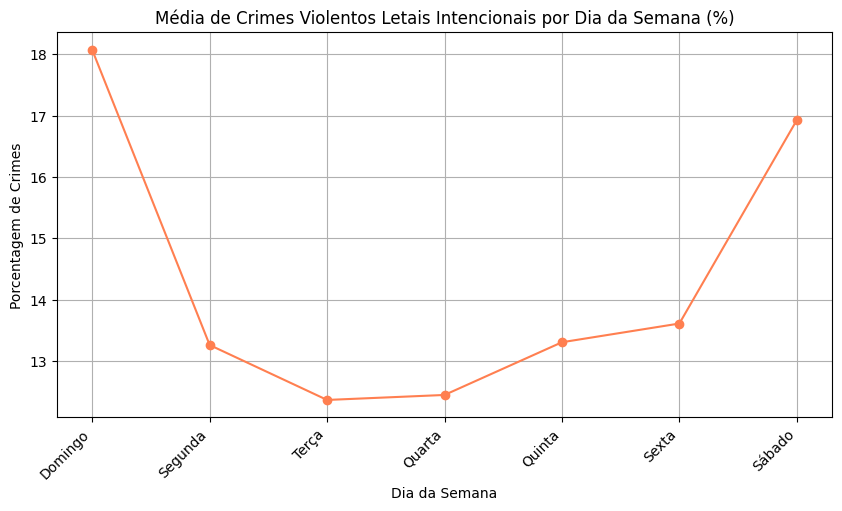

In [24]:
# Calculando a média de crimes por dia da semana
media_crimes_por_dia_semana = df_filtrado.groupby('Dia_da_Semana')['Natureza'].count().reset_index()
media_crimes_por_dia_semana = media_crimes_por_dia_semana.rename(columns={'Natureza': 'Média de Crimes'})

# Calculando a porcentagem em relação ao total de crimes no ano
total_crimes_ano = df_filtrado['Natureza'].count()
media_crimes_por_dia_semana['Porcentagem'] = (media_crimes_por_dia_semana['Média de Crimes'] / total_crimes_ano) * 100

# Ordenando os dias da semana
dias_semana_ordem = ['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado']
media_crimes_por_dia_semana['Dia_da_Semana'] = pd.Categorical(media_crimes_por_dia_semana['Dia_da_Semana'], categories=dias_semana_ordem, ordered=True)
media_crimes_por_dia_semana = media_crimes_por_dia_semana.sort_values('Dia_da_Semana')

# Gráfico da média de crimes por dia da semana em porcentagem
plt.figure(figsize=(10, 5))
plt.plot(media_crimes_por_dia_semana['Dia_da_Semana'], media_crimes_por_dia_semana['Porcentagem'], marker='o', color='coral', linestyle='-')
plt.title('Média de Crimes Violentos Letais Intencionais por Dia da Semana (%)')
plt.xlabel('Dia da Semana')
plt.ylabel('Porcentagem de Crimes')
plt.xticks(rotation=45, ha='right')  # Rotação dos rótulos do eixo x para melhor legibilidade
plt.grid()
plt.show()

##### Furto

###### Ano

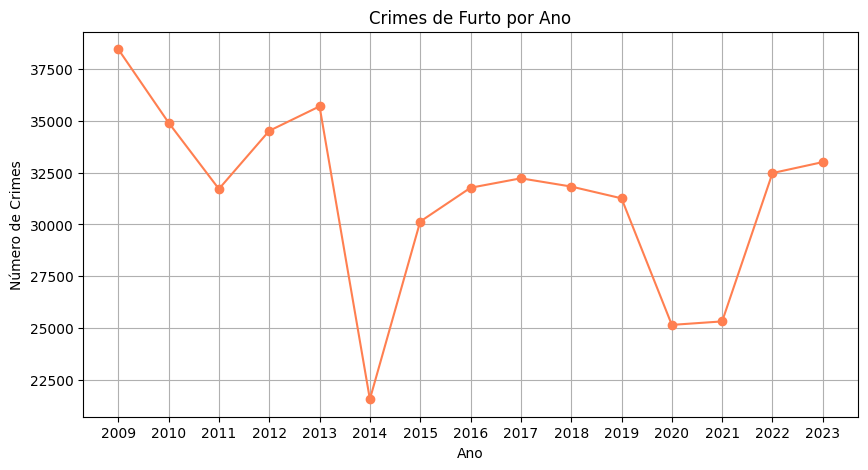

In [25]:
df_furto = df[df['Natureza'] == 'FURTO']

# Calculando a média de crimes por ano
media_crimes_por_ano = df_furto.groupby('Ano')['Natureza'].count().reset_index()
media_crimes_por_ano = media_crimes_por_ano.rename(columns={'Natureza': 'Média de Crimes'})

# Gráfico da média de crimes de Furto
plt.figure(figsize=(10, 5))
plt.plot(media_crimes_por_ano['Ano'], media_crimes_por_ano['Média de Crimes'], marker='o', color='coral', linestyle='-')
plt.title('Crimes de Furto por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Crimes')
plt.xticks(media_crimes_por_ano['Ano'])
plt.grid()
plt.show()

###### Mês

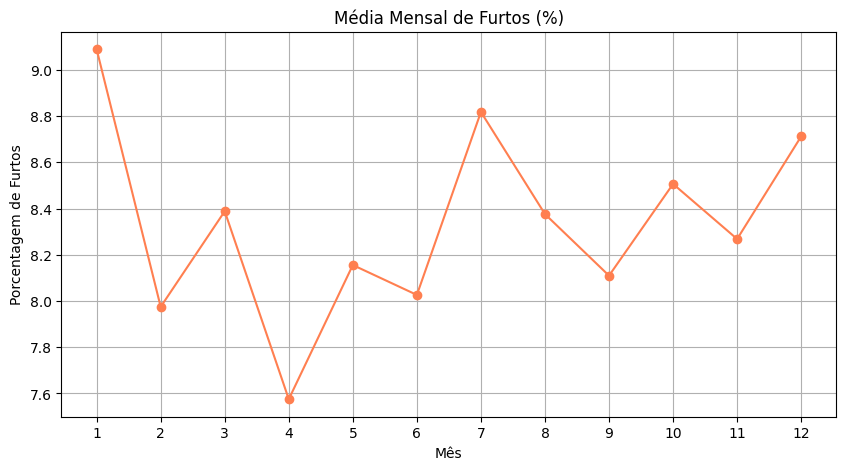

In [26]:
# Agrupar por mês e calcular a contagem total de furtos
furtos_por_mes = df_furto.groupby('Mês')['Natureza'].count().reset_index()
furtos_por_mes = furtos_por_mes.rename(columns={'Natureza': 'Total de Furtos'})

# Calcular o total de furtos no período
total_furtos_periodo = df_furto['Natureza'].count()

# Calcular a porcentagem da média mensal em relação ao total do período
furtos_por_mes['Porcentagem Média Mensal'] = (furtos_por_mes['Total de Furtos'] / total_furtos_periodo) * 100

plt.figure(figsize=(10, 5))
plt.plot(furtos_por_mes['Mês'], furtos_por_mes['Porcentagem Média Mensal'], marker='o', color='coral', linestyle='-')
plt.title('Média Mensal de Furtos (%)')
plt.xlabel('Mês')
plt.ylabel('Porcentagem de Furtos')
plt.xticks(furtos_por_mes['Mês'])
plt.grid(True)
plt.show()

###### Dia do Mês

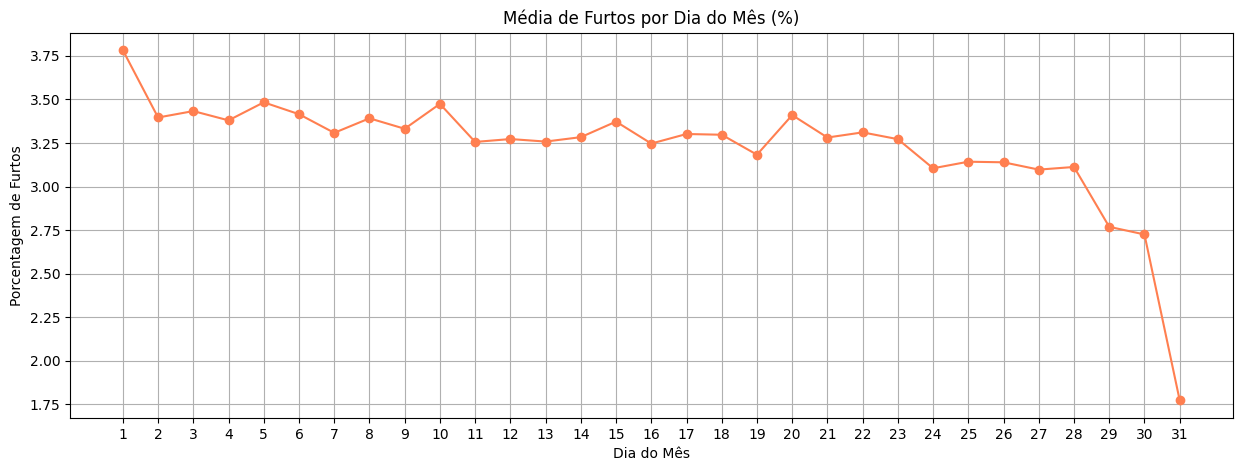

In [27]:
furtos_por_dia = df_furto.groupby('Dia')['Natureza'].count().reset_index()
furtos_por_dia = furtos_por_dia.rename(columns={'Natureza': 'Total de Furtos'})

# Calcular o total de furtos no período
total_furtos_periodo = df_furto['Natureza'].count()

# Calcular a porcentagem da média por dia em relação ao total do período
furtos_por_dia['Porcentagem Média Diária'] = (furtos_por_dia['Total de Furtos'] / total_furtos_periodo) * 100

# Gráfico da média de furtos por dia do mês em porcentagem
plt.figure(figsize=(15, 5))  # Aumentar a largura para melhor visualização dos 31 dias
plt.plot(furtos_por_dia['Dia'], furtos_por_dia['Porcentagem Média Diária'], marker='o', color='coral', linestyle='-')
plt.title('Média de Furtos por Dia do Mês (%)')
plt.xlabel('Dia do Mês')
plt.ylabel('Porcentagem de Furtos')
plt.xticks(furtos_por_dia['Dia'])  # Mostrar todos os dias do mês no eixo x
plt.grid(True)
plt.show()

###### Dia

<ipython-input-28-5716ebd8e773>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  furtos_por_dia_semana = df_furto.groupby('Dia_da_Semana')['Natureza'].count().reset_index()


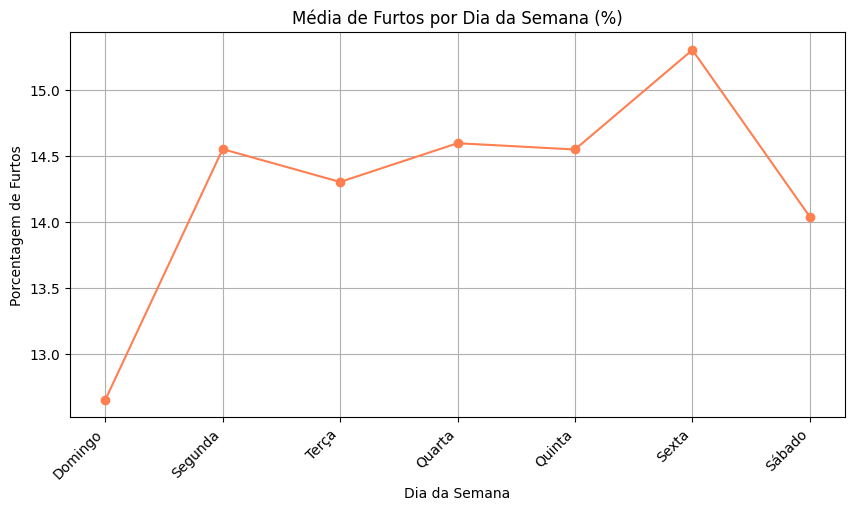

In [28]:
furtos_por_dia_semana = df_furto.groupby('Dia_da_Semana')['Natureza'].count().reset_index()
furtos_por_dia_semana = furtos_por_dia_semana.rename(columns={'Natureza': 'Total de Furtos'})

# Calcular o total de furtos no período
total_furtos_periodo = df_furto['Natureza'].count()

# Calcular a porcentagem da média por dia da semana em relação ao total do período
furtos_por_dia_semana['Porcentagem Média Semanal'] = (furtos_por_dia_semana['Total de Furtos'] / total_furtos_periodo) * 100

# Ordenar os dias da semana
dias_semana_ordem = ['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado']
furtos_por_dia_semana['Dia_da_Semana'] = pd.Categorical(furtos_por_dia_semana['Dia_da_Semana'], categories=dias_semana_ordem, ordered=True)
furtos_por_dia_semana = furtos_por_dia_semana.sort_values('Dia_da_Semana')

# Gráfico da média de furtos por dia da semana em porcentagem
plt.figure(figsize=(10, 5))
plt.plot(furtos_por_dia_semana['Dia_da_Semana'], furtos_por_dia_semana['Porcentagem Média Semanal'], marker='o', color='coral', linestyle='-')
plt.title('Média de Furtos por Dia da Semana (%)')
plt.xlabel('Dia da Semana')
plt.ylabel('Porcentagem de Furtos')
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.grid(True)
plt.show()

### Perfil da Vítima

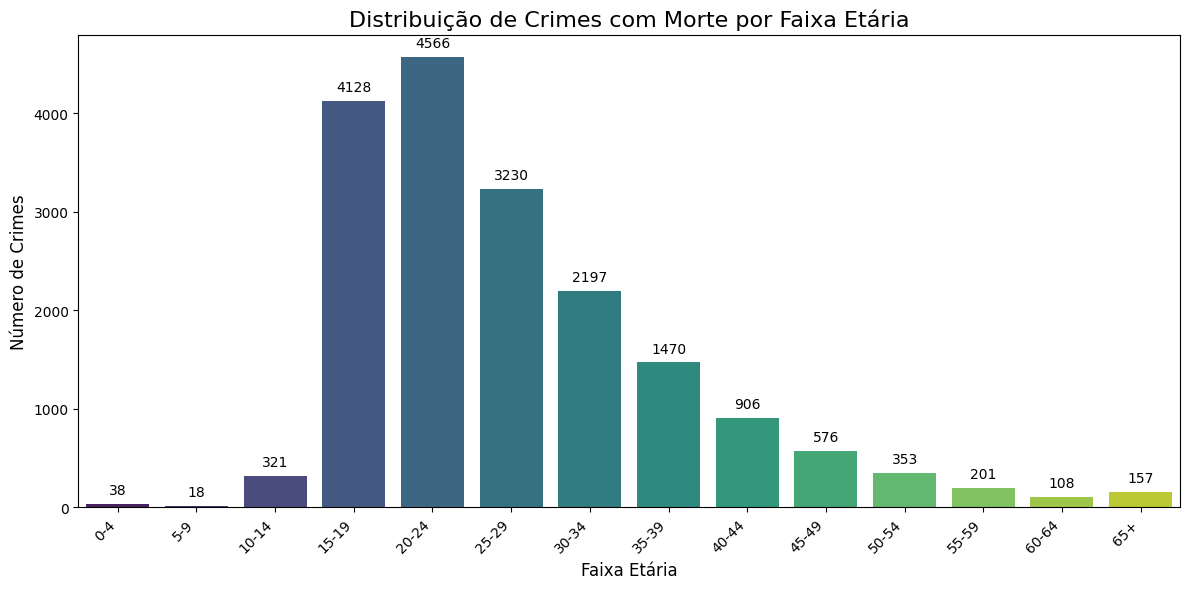

In [29]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, float("inf")]
labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65+']
df['Faixa_Etária'] = pd.cut(df['Idade_da_Vítima'], bins=bins, labels=labels, right=False)

# Filtrando para incluir apenas crimes com morte
crimes_com_morte = df.loc[df['Natureza'].isin(['HOMICIDIO DOLOSO', 'ROUBO SEGUIDO DE MORTE (LATROCINIO)',
 'LESAO CORPORAL SEGUIDA DE MORTE', 'FEMINICÍDIO'])]

# Gráfico
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Faixa_Etária', data=crimes_com_morte, palette="viridis", hue='Faixa_Etária', legend=False)
plt.title('Distribuição de Crimes com Morte por Faixa Etária', fontsize=16)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Número de Crimes', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adicionando rótulos de dados às barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

### Distribuição por Escolaridade

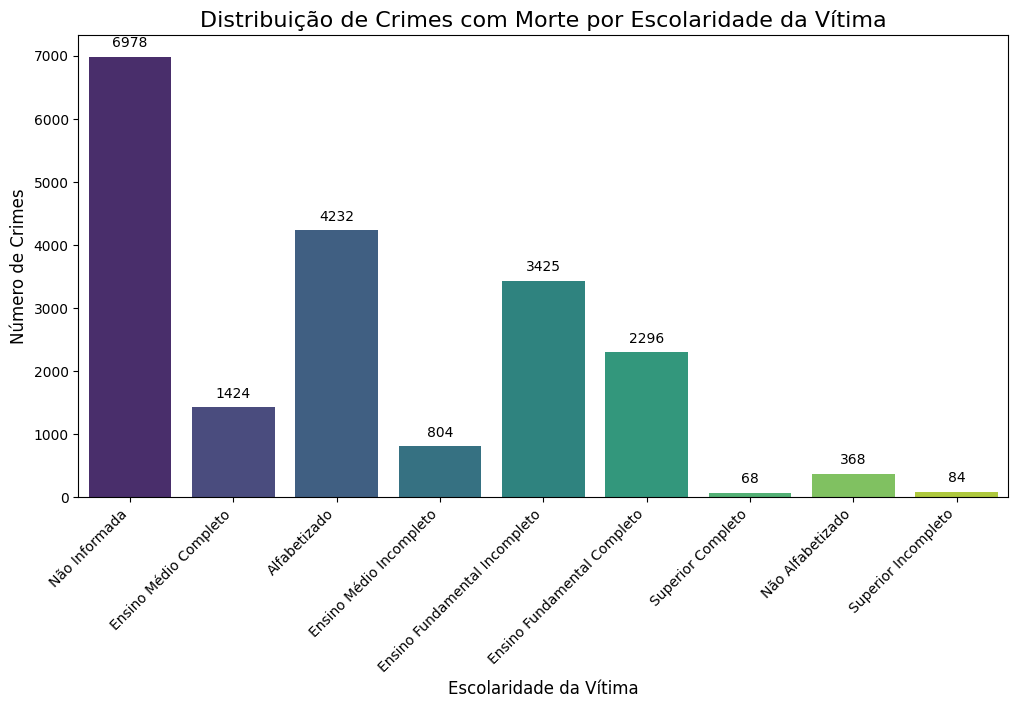

In [30]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Escolaridade_da_Vítima', data=df, hue='Escolaridade_da_Vítima',
                   palette="viridis", dodge=False, legend=False)

# Usando 'Escolaridade da Vítima' no eixo x e hue

plt.title('Distribuição de Crimes com Morte por Escolaridade da Vítima', fontsize=16)
plt.xlabel('Escolaridade da Vítima', fontsize=12)
plt.ylabel('Número de Crimes', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Ajustando rotação dos rótulos do eixo x

# Adicionando rótulos de dados às barras (com números inteiros)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.show()

### Distribuição por Gênero

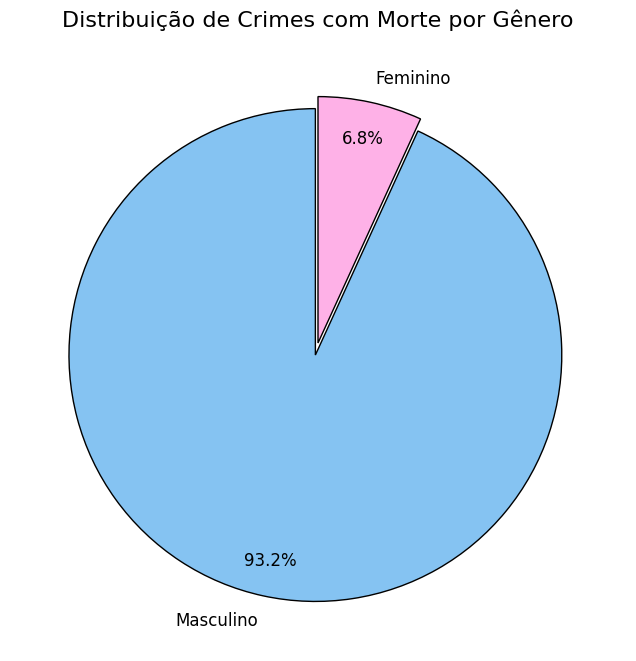

In [31]:
# Filtrar somente gênero Masculino e Feminino, excluindo "Não Informado"
df_genero = df[df['Gênero'].isin(['Masculino', 'Feminino'])]

# Gráfico de Distribuição por Gênero (sem "Não Informado")
genero = df_genero['Gênero'].value_counts()

colors = ['#85C3F2', '#FEB1E7']

# Gráfico de pizza
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(genero, labels=genero.index, autopct='%1.1f%%', startangle=90,
                                  colors=colors, textprops={'fontsize': 12},
                                  wedgeprops={'edgecolor': 'black', 'linewidth': 1},
                                  pctdistance=0.85, explode=[0.05, 0])

plt.title('Distribuição de Crimes com Morte por Gênero', fontsize=16)
plt.show()

### Distribuição por Raça

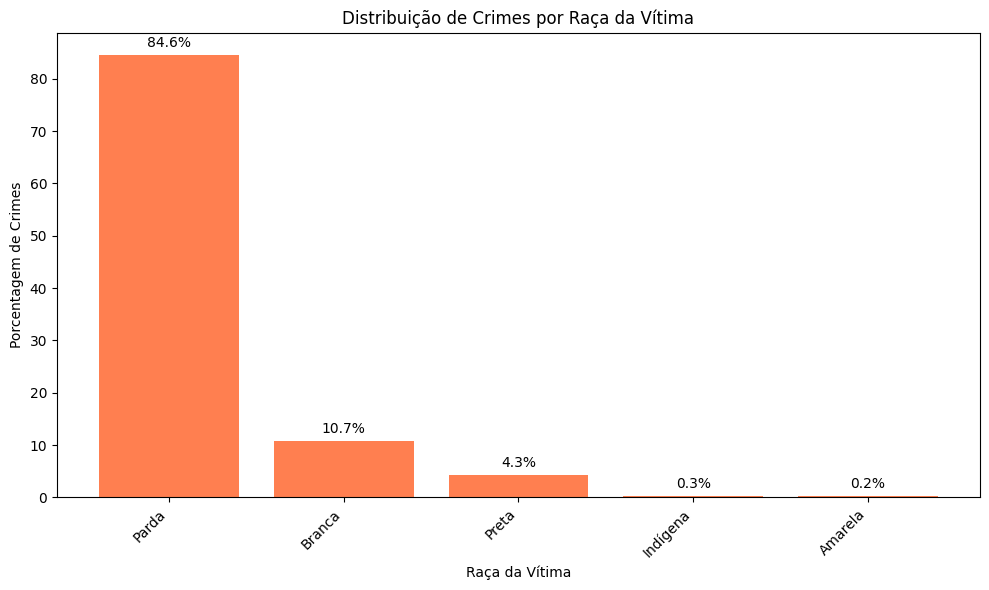

In [32]:
df_raca = df[df['Raça_da_Vítima'] != 'Não Informada']

# Calcular a distribuição das raças
race_distribution = df_raca['Raça_da_Vítima'].value_counts()

# Calcular as porcentagens
total_crimes = race_distribution.sum()
percentages = (race_distribution / total_crimes) * 100

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(race_distribution.index, percentages, color='coral')

# Adicionar rótulos de porcentagem acima das barras
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
             f'{percentage:.1f}%', ha='center', va='bottom')

plt.title('Distribuição de Crimes por Raça da Vítima')
plt.xlabel('Raça da Vítima')
plt.ylabel('Porcentagem de Crimes')
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajustar o layout para evitar sobreposição de elementos
plt.show()

### AIS x Nº de Crimes

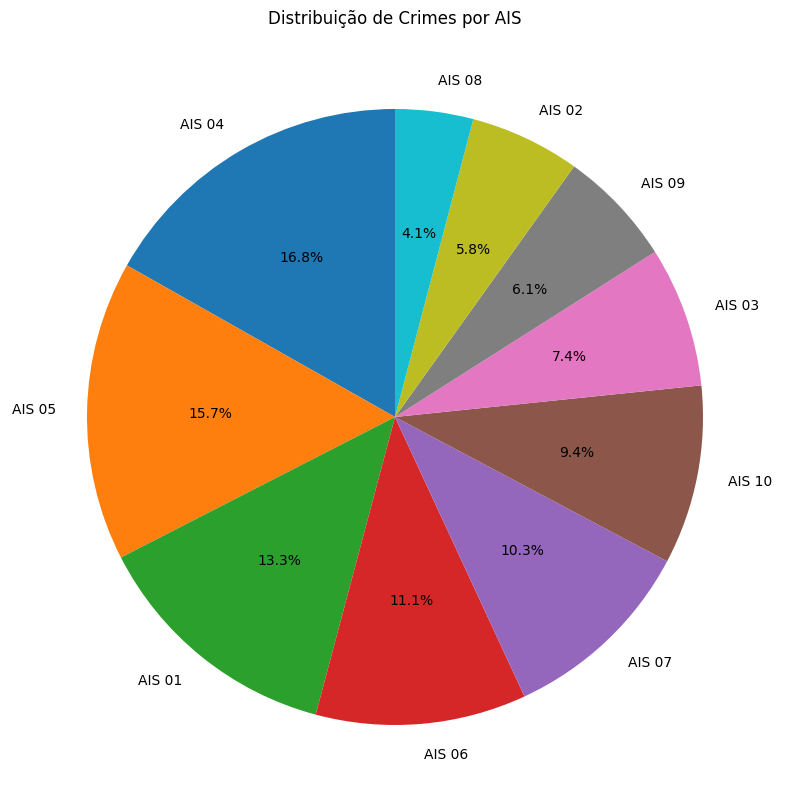

In [33]:
crimes_por_ais = df[df['AIS'] != 'AIS Não Identificada (Fortaleza)'].groupby('AIS')['Natureza'].count().reset_index(name='Total_de_Crimes')

# Calcula o total de crimes no DataFrame
total_de_crimes = crimes_por_ais['Total_de_Crimes'].sum()

# Calcula a porcentagem de crimes em cada AIS
crimes_por_ais['Porcentagem'] = (crimes_por_ais['Total_de_Crimes'] / total_de_crimes) * 100

# Ordena o DataFrame pela porcentagem de crimes em ordem decrescente
crimes_por_ais = crimes_por_ais.sort_values('Porcentagem', ascending=False)

# Cria o gráfico de pizza com as novas cores
plt.figure(figsize=(10, 10))
plt.pie(crimes_por_ais['Porcentagem'], labels=crimes_por_ais['AIS'], autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Crimes por AIS')
plt.show()

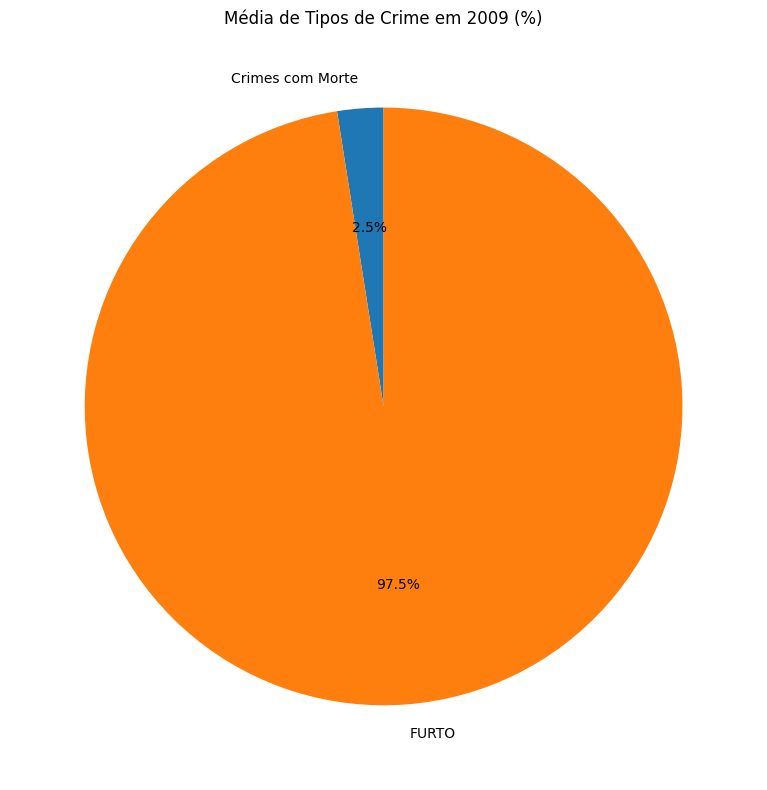

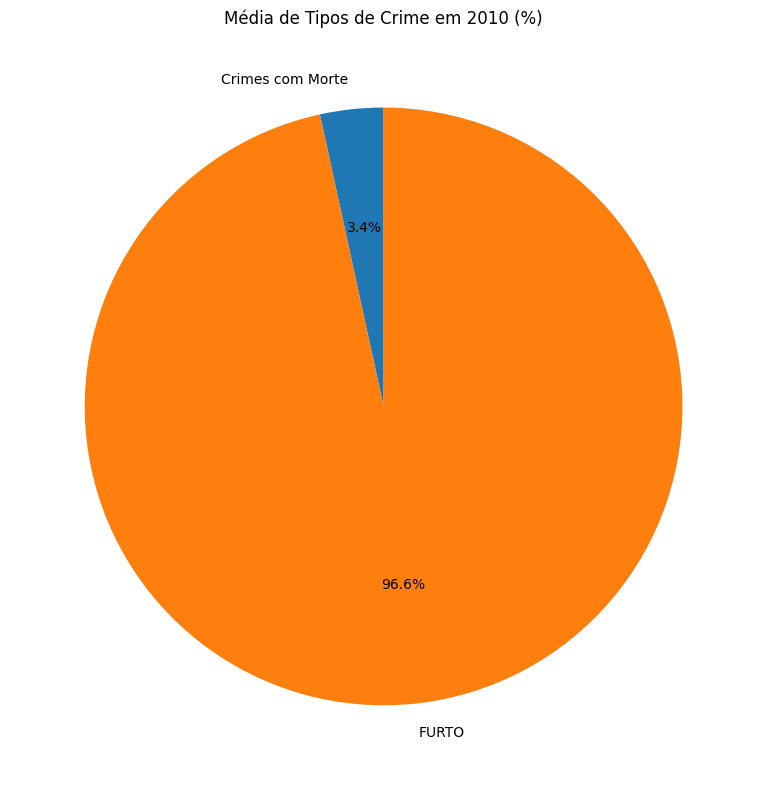

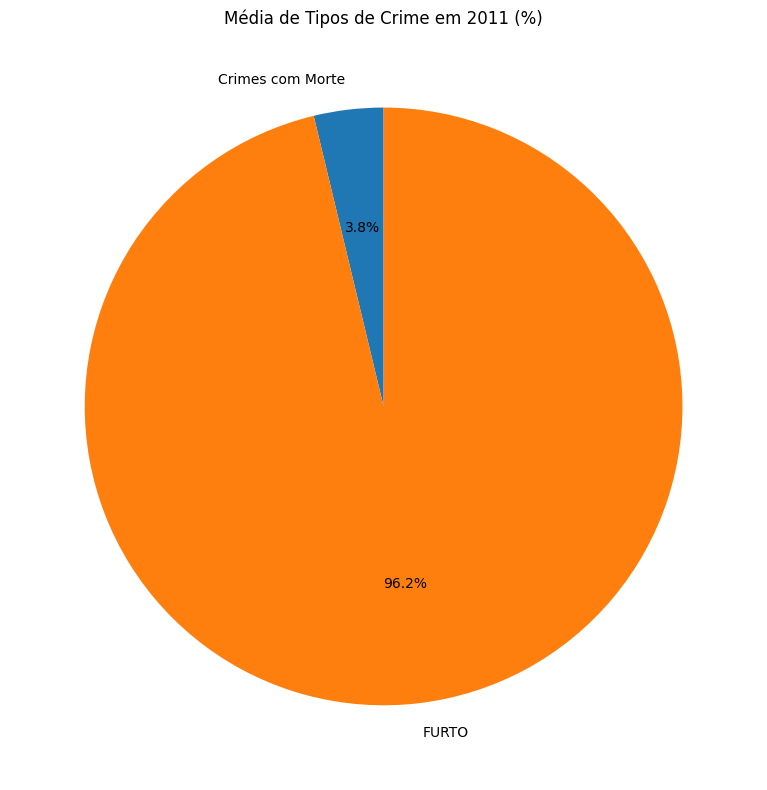

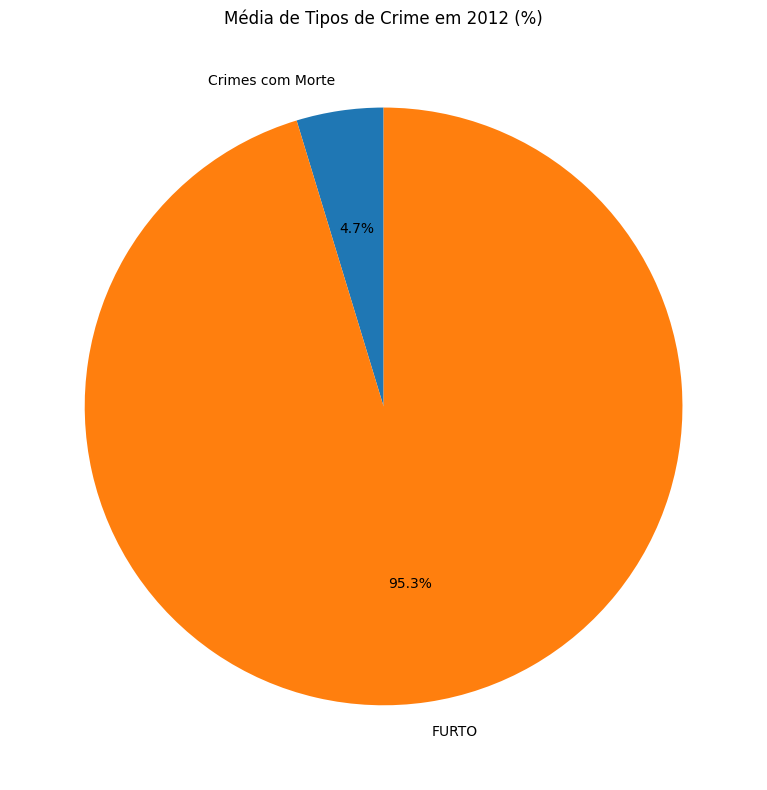

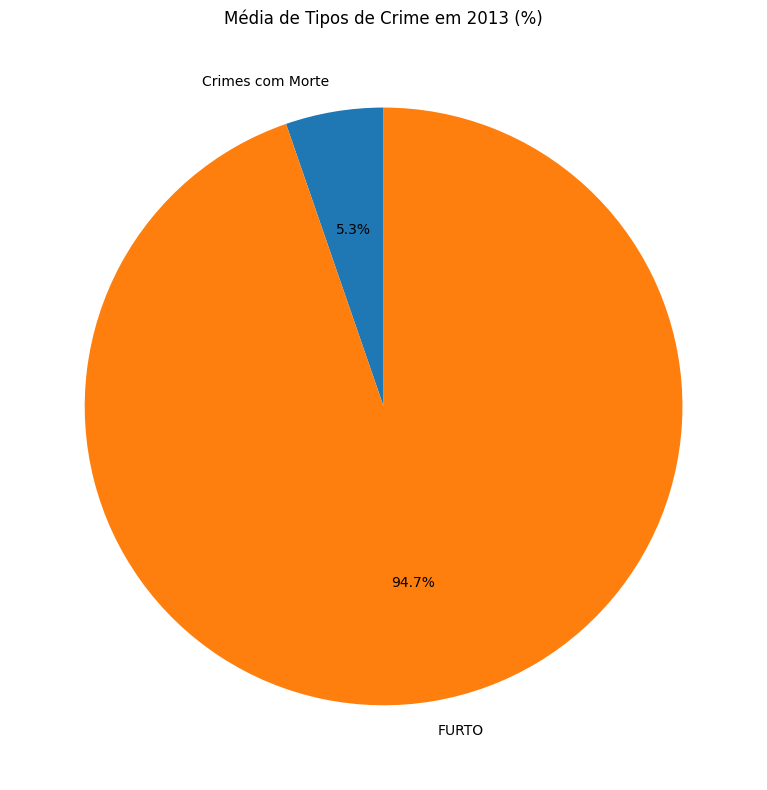

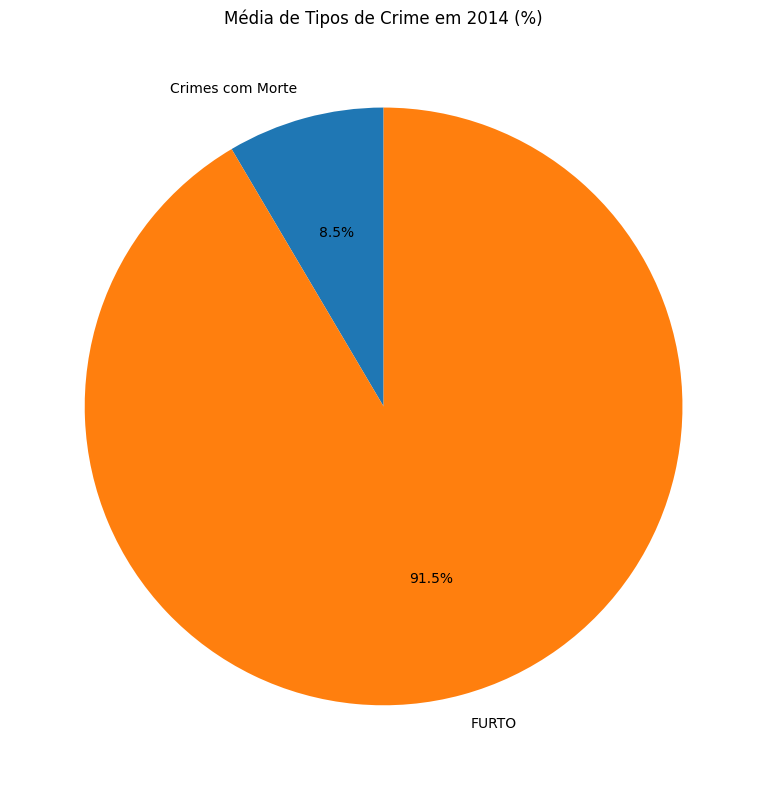

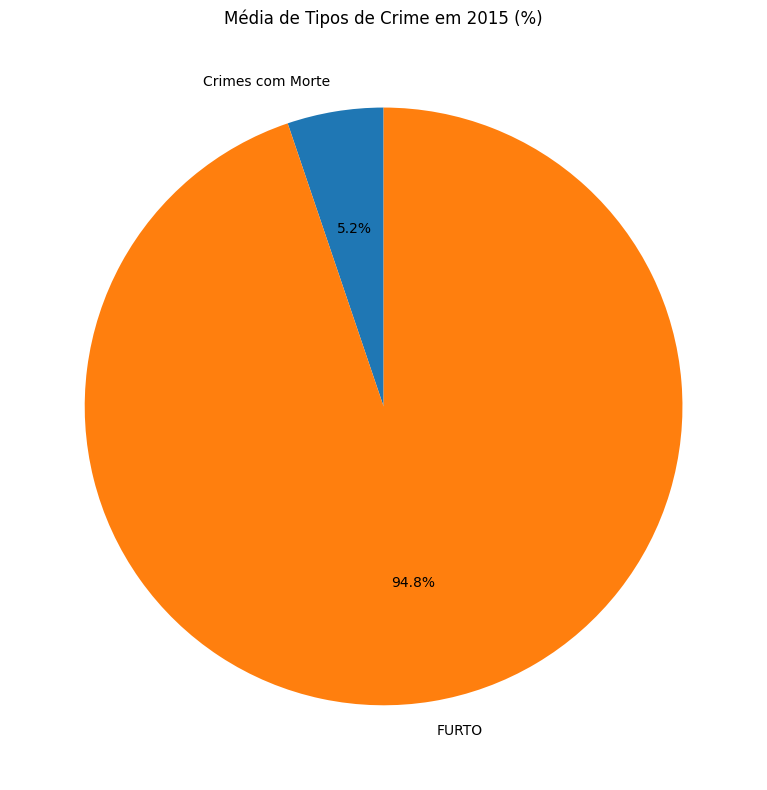

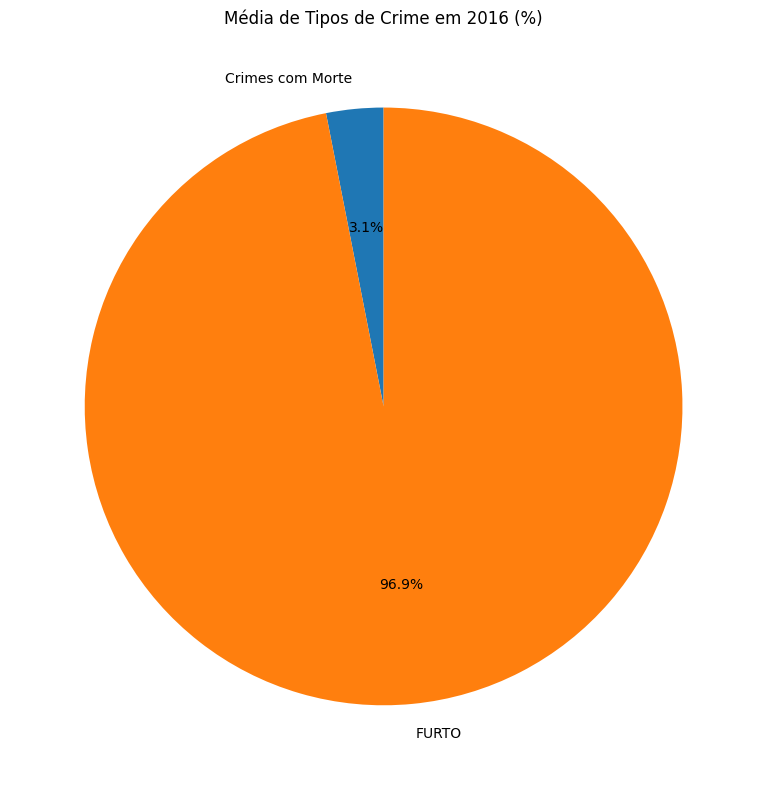

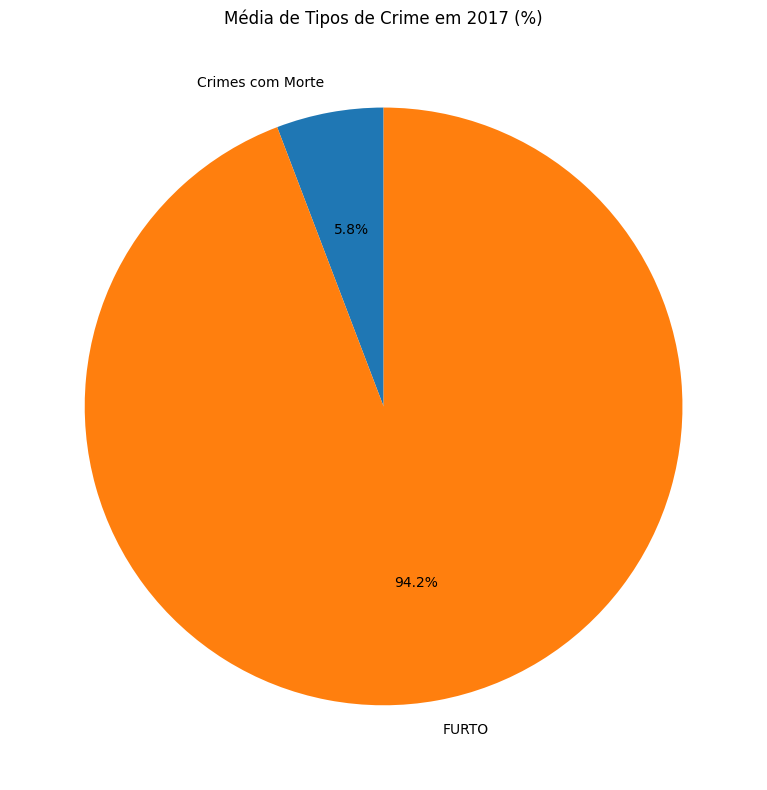

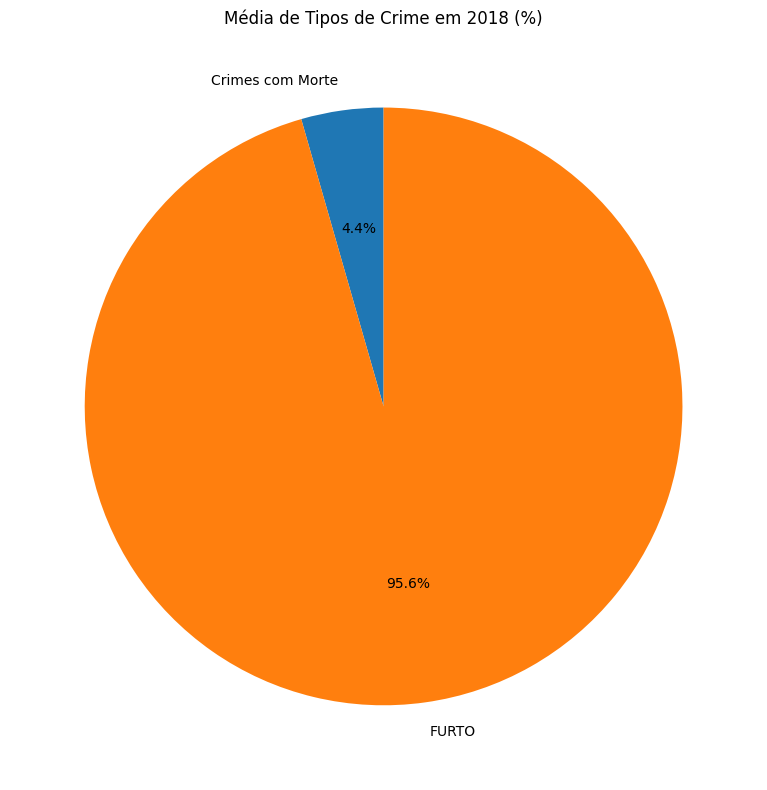

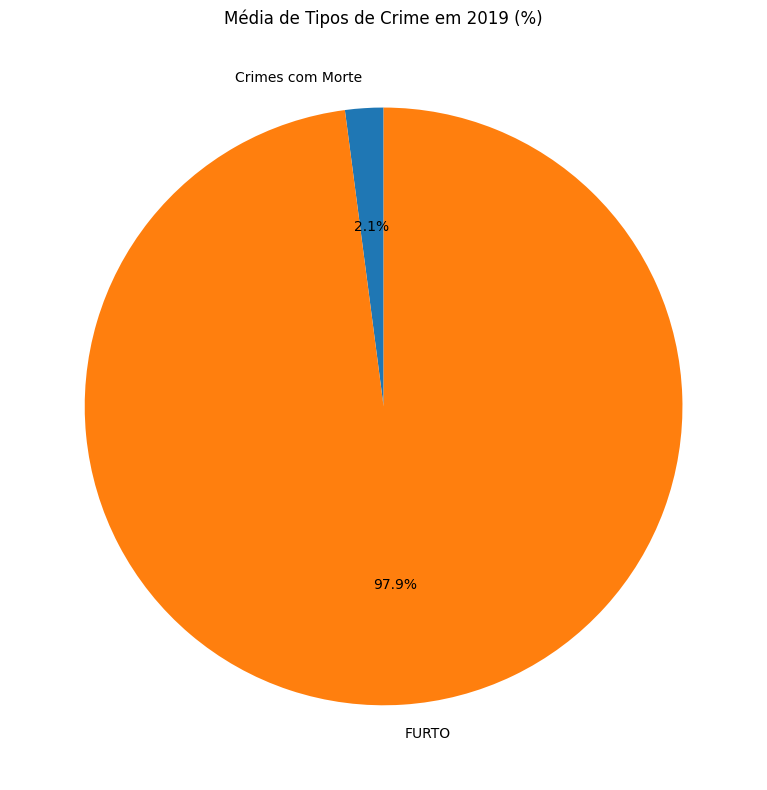

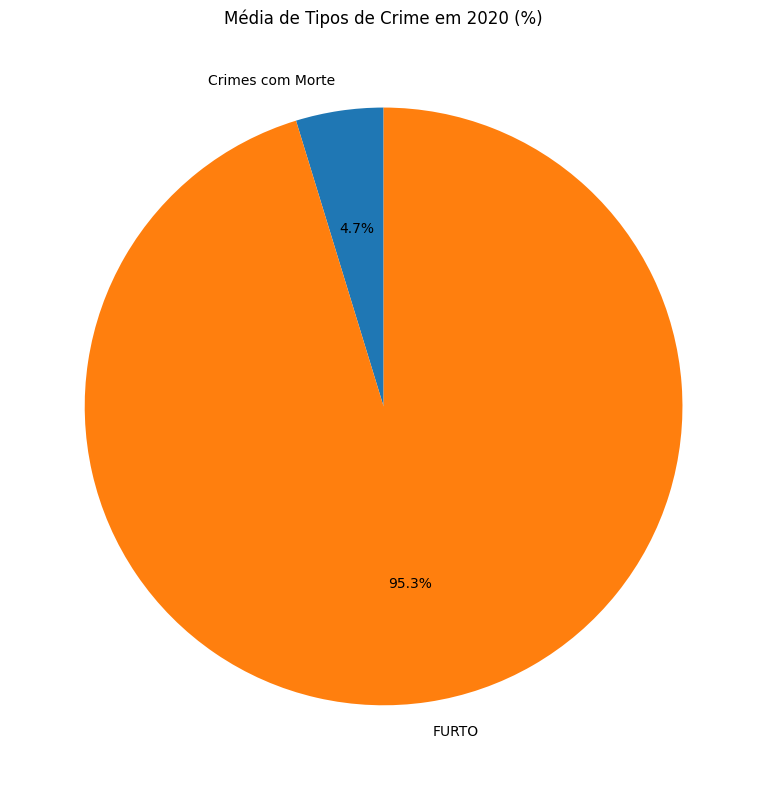

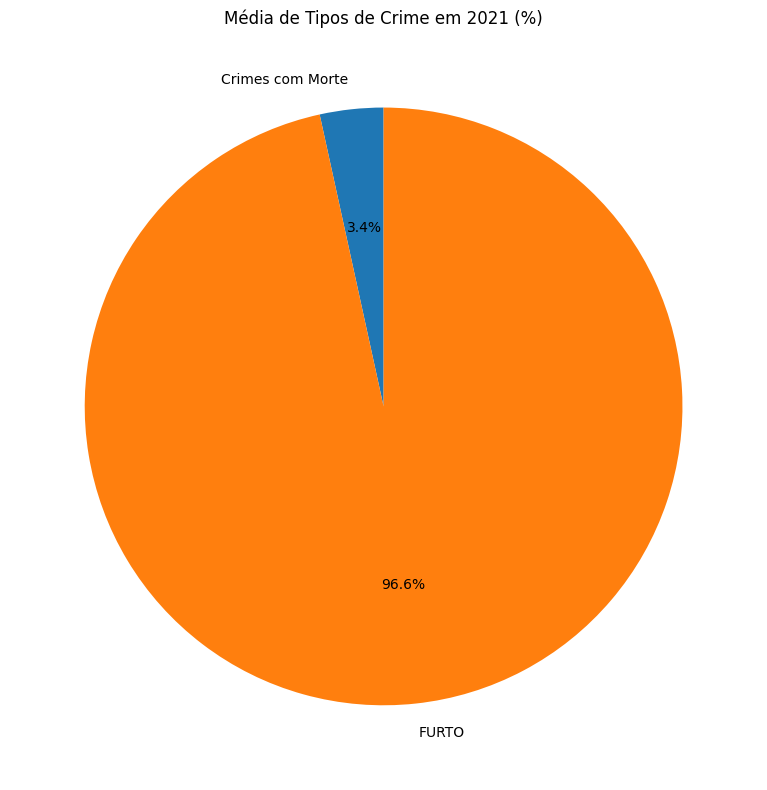

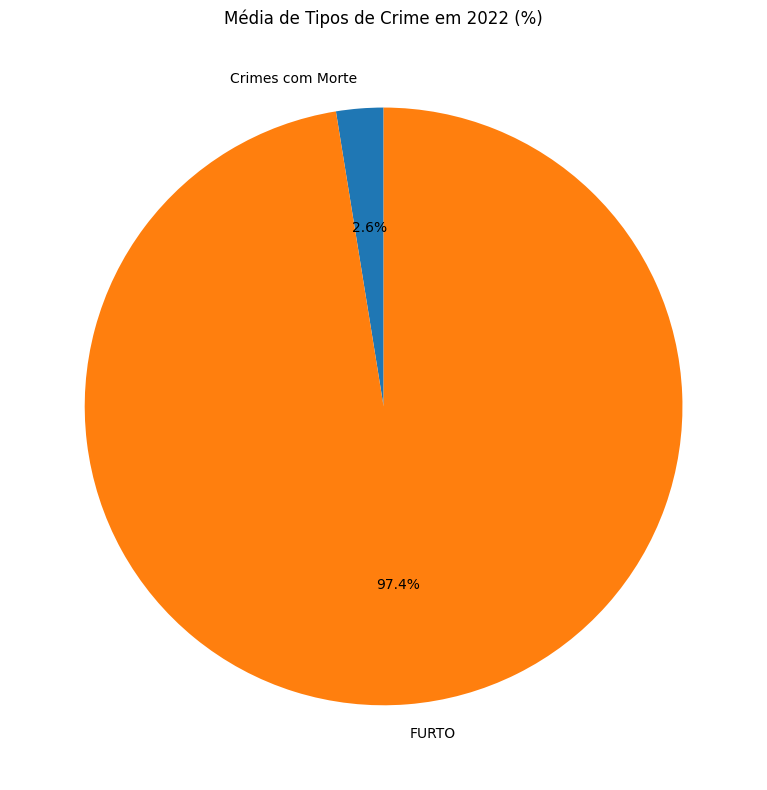

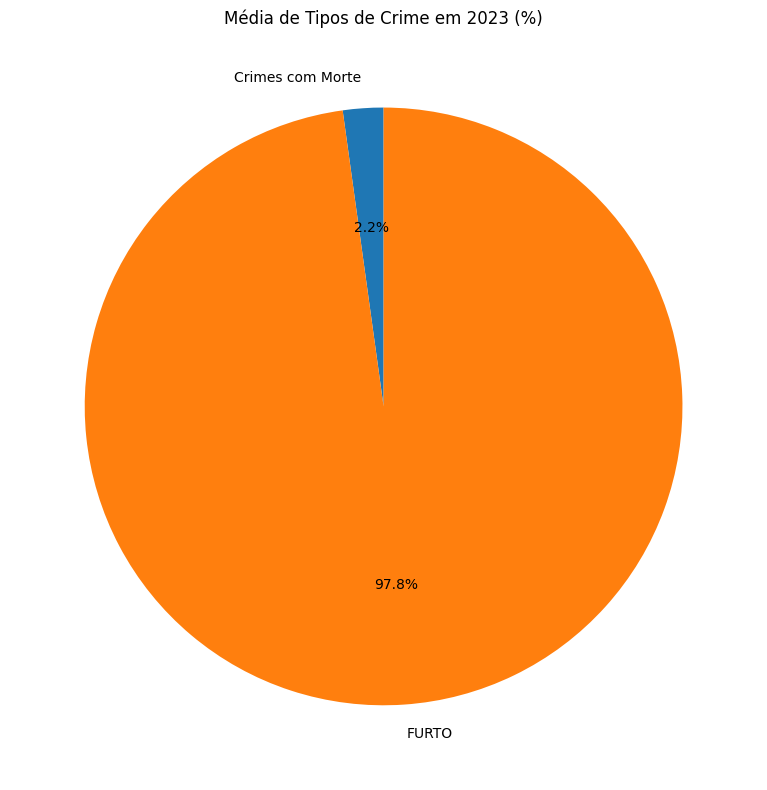

In [34]:
# Agrupa os tipos de crime desejados em 'Crimes com Morte'
df['Natureza_Agrupada'] = df['Natureza'].apply(lambda x: 'Crimes com Morte' if x in ['HOMICIDIO DOLOSO', 'ROUBO SEGUIDO DE MORTE (LATROCINIO)', 'LESAO CORPORAL SEGUIDA DE MORTE', 'FEMINICÍDIO'] else x)

# Calcula a média de crimes por ano para cada tipo de crime (incluindo o grupo 'Crimes com Morte')
media_crimes_por_ano = df.groupby(['Ano', 'Natureza_Agrupada'])['Natureza_Agrupada'].count().reset_index(name='Count')

# Calcula a porcentagem de cada tipo de crime em relação ao total de crimes no ano
total_crimes_por_ano = media_crimes_por_ano.groupby('Ano')['Count'].sum().reset_index(name='Total')
media_crimes_por_ano = pd.merge(media_crimes_por_ano, total_crimes_por_ano, on='Ano')
media_crimes_por_ano['Percentage'] = (media_crimes_por_ano['Count'] / media_crimes_por_ano['Total']) * 100

# Cria o gráfico de pizza para cada ano
for ano in media_crimes_por_ano['Ano'].unique():
    # Filtra os dados para o ano específico
    data_ano = media_crimes_por_ano[media_crimes_por_ano['Ano'] == ano]

    # Cria o gráfico de pizza
    plt.figure(figsize=(8, 8))
    plt.pie(data_ano['Percentage'], labels=data_ano['Natureza_Agrupada'], autopct='%1.1f%%', startangle=90)
    plt.title(f'Média de Tipos de Crime em {ano} (%)')
    plt.tight_layout()
    plt.show()